In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf

#univariate one step problem with lstm
from numpy import array
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

#Estas son paqueterías complementarias para la descarga de datos financieros
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

#Plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Obtain data

In [2]:
#Establecemos las fechas de consulta:
start = '2015-01-01'
end = '2021-12-31'

#Variables
variables = ['AMZN','AAPL','IBM', 'GOOGL']

#Obtain data
amzn = pdr.get_data_yahoo("AMZN", start, end)['Close']
data_variables = pdr.get_data_yahoo(variables, start, end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [3]:
dt = pd.DataFrame(amzn)
dt.head()

,Close
Date,
2015-01-02 00:00:00-05:00,15.4260
2015-01-05 00:00:00-05:00,15.1095
2015-01-06 00:00:00-05:00,14.7645
2015-01-07 00:00:00-05:00,14.9210
2015-01-08 00:00:00-05:00,15.0230


In [4]:
dt.tail()

,Close
Date,
2021-12-23 00:00:00-05:00,171.068497
2021-12-27 00:00:00-05:00,169.669495
2021-12-28 00:00:00-05:00,170.660995
2021-12-29 00:00:00-05:00,169.201004
2021-12-30 00:00:00-05:00,168.644501


In [5]:
data_variables.head()

,AAPL,AMZN,GOOGL,IBM
Date,,,,
2015-01-02 00:00:00-05:00,27.332500,15.4260,26.477501,154.933075
2015-01-05 00:00:00-05:00,26.562500,15.1095,25.973000,152.495224
2015-01-06 00:00:00-05:00,26.565001,14.7645,25.332001,149.206497
2015-01-07 00:00:00-05:00,26.937500,14.9210,25.257500,148.231354
2015-01-08 00:00:00-05:00,27.972500,15.0230,25.345501,151.453156


In [6]:
data_variables.tail()

,AAPL,AMZN,GOOGL,IBM
Date,,,,
2021-12-23 00:00:00-05:00,176.279999,171.068497,146.916504,130.630005
2021-12-27 00:00:00-05:00,180.330002,169.669495,147.906494,131.619995
2021-12-28 00:00:00-05:00,179.289993,170.660995,146.686996,132.630005
2021-12-29 00:00:00-05:00,179.380005,169.201004,146.654999,133.350006
2021-12-30 00:00:00-05:00,178.199997,168.644501,146.200500,133.910004


# Plot the series

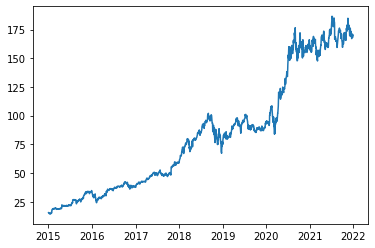

In [7]:
plt.plot(dt)

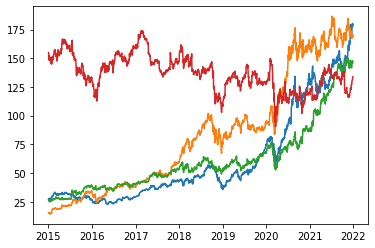

In [8]:
plt.plot(data_variables)

# Preprocess the data

In [9]:
dataindex = pd.to_datetime(dt.index)
dataindex

DatetimeIndex(['2015-01-02 00:00:00-05:00', '2015-01-05 00:00:00-05:00',
               '2015-01-06 00:00:00-05:00', '2015-01-07 00:00:00-05:00',
               '2015-01-08 00:00:00-05:00', '2015-01-09 00:00:00-05:00',
               '2015-01-12 00:00:00-05:00', '2015-01-13 00:00:00-05:00',
               '2015-01-14 00:00:00-05:00', '2015-01-15 00:00:00-05:00',
               ...
               '2021-12-16 00:00:00-05:00', '2021-12-17 00:00:00-05:00',
               '2021-12-20 00:00:00-05:00', '2021-12-21 00:00:00-05:00',
               '2021-12-22 00:00:00-05:00', '2021-12-23 00:00:00-05:00',
               '2021-12-27 00:00:00-05:00', '2021-12-28 00:00:00-05:00',
               '2021-12-29 00:00:00-05:00', '2021-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1762, freq=None)

### Outcome variable

In [10]:
output_data = amzn.to_numpy().reshape((-1,1))
output_data

array([[ 15.42599964],
       [ 15.10949993],
       [ 14.76449966],
       ...,
       [170.66099548],
       [169.20100403],
       [168.64450073]])

### Predict variables

In [11]:
input_data = data_variables.to_numpy().reshape((len(data_variables),len(data_variables.columns)))
input_data

array([[ 27.33250046,  15.42599964,  26.47750092, 154.93307495],
       [ 26.5625    ,  15.10949993,  25.97299957, 152.495224  ],
       [ 26.56500053,  14.76449966,  25.33200073, 149.20649719],
       ...,
       [179.28999329, 170.66099548, 146.68699646, 132.63000488],
       [179.38000488, 169.20100403, 146.65499878, 133.3500061 ],
       [178.19999695, 168.64450073, 146.20050049, 133.91000366]])

# Train and test data; data definition

In [12]:
split_percent = 0.90
split = int(split_percent*len(output_data))
n_back = 10

date_train = dataindex[:split]
date_test = dataindex[split:]

train_generator = TimeseriesGenerator(input_data[:split], output_data[:split], length=n_back, batch_size=25)
test_generator = TimeseriesGenerator(input_data[split:], output_data[split:], length=n_back, batch_size=1)

In [13]:
print(len(input_data[:split]))
print(len(input_data[split:]))
print(len(input_data))

1585
177
1762


In [14]:
print('Samples: %d' % len(train_generator))
print('Samples: %d' % len(test_generator))

Samples: 63
Samples: 167


# Train the model

In [48]:
#Configuramos la de red.
model = Sequential()
model.add(
    LSTM(100, activation='relu', input_shape=(n_back, len(data_variables.columns)))
)

model.add(Dense(len(data_variables.columns)))
model.compile(optimizer='adam', loss='mse')

num_epochs = 50
model.fit_generator(train_generator, epochs=num_epochs, verbose=0)

# Forecast in the test data

In [51]:
#Predicción en el set de prueba:
prediction = model.predict(test_generator)

#El siguiente se emplea para pasar el tipo de datos de tensores a datos de una dimensión, aplicamos la función reshape.
output_data = output_data.reshape((-1))

prediction_amzn = []
for i in range(len(prediction)):
    prediction_amzn.append(prediction[i][0])

167/167 [==============================] - 0s 905us/step


In [67]:
#Podemos primeramente graficar las secciones: la serie de entrenamiento, la predicción en la sección de prueba y la sección de prueba.
trace1 = go.Scatter(
    x = date_train, y = output_data[:split],
    mode = 'lines', name = 'Data'
)
trace2 = go.Scatter(
    x = date_test[n_back:], y = prediction_amzn,
    mode = 'lines', name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test, y = output_data[split:],
    mode='lines', name = 'Ground Truth'
)
layout = go.Layout(
    title = "AMZN Stock",
    xaxis = {'title':"Date"},
    yaxis = {'title':"Close"}
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

# Error obtained in the test data

In [68]:
#Evaluar el rendimiento del modelo
test_loss = model.evaluate(test_generator)
print('Test loss:', test_loss)

167/167 [==============================] - 0s 985us/step - loss: 69.7360
Test loss: 69.73603820800781


# Forecast the future data

In [95]:
#Hacer predicciones para el futuro
steps = 20

for i in range(steps):
    row_data = []

    for j in range(n_back):
        if i-j-1<0:
            row_data.append(input_data[i-j-1])
        else:
            row_data.append(forecast[i-j-1])
    
    predicted_value = model.predict(np.array(row_data).reshape(-1, n_back, len(data_variables.columns)))
    forecast.append(predicted_value[0])
    
forecast

1/1 [==============================] - 0s 15ms/step


[array([168.98706, 166.39044, 171.65727, 170.64894], dtype=float32),
 array([169.94292, 168.10776, 172.38208, 171.69183], dtype=float32),
 array([172.86243, 170.55183, 173.60716, 173.82637], dtype=float32),
 array([172.20885, 169.86891, 174.30502, 173.90704], dtype=float32),
 array([175.54749, 172.9691 , 174.0391 , 176.12315], dtype=float32),
 array([179.21333, 177.01239, 177.56927, 178.07037], dtype=float32),
 array([179.85213, 177.69815, 175.96243, 177.5713 ], dtype=float32),
 array([186.0167 , 183.44719, 180.85661, 186.9985 ], dtype=float32),
 array([188.6028 , 185.22778, 182.21674, 188.92784], dtype=float32),
 array([190.98453, 188.7386 , 184.07509, 191.69012], dtype=float32),
 array([193.82237, 191.1986 , 185.21855, 193.32796], dtype=float32),
 array([196.25204, 193.80458, 187.82526, 195.92928], dtype=float32),
 array([199.14261, 195.99759, 189.96782, 198.38177], dtype=float32),
 array([201.19743, 198.88548, 193.3113 , 201.15933], dtype=float32),
 array([205.16235, 202.26396, 195.